<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span><ul class="toc-item"><li><span><a href="#Software-and-conventions" data-toc-modified-id="Software-and-conventions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Software and conventions</a></span></li></ul></li><li><span><a href="#Experiment-with-Terrain-Routing-Options" data-toc-modified-id="Experiment-with-Terrain-Routing-Options-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Experiment with Terrain Routing Options</a></span><ul class="toc-item"><li><span><a href="#Background" data-toc-modified-id="Background-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Background</a></span></li><li><span><a href="#Objective" data-toc-modified-id="Objective-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Objective</a></span></li><li><span><a href="#Step-1:-Create-and-run-first-baseline-simulation" data-toc-modified-id="Step-1:-Create-and-run-first-baseline-simulation-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Step 1: Create and run first baseline simulation</a></span></li><li><span><a href="#Step-2:-Create-and-run-the-&quot;overland-routing-off&quot;-simulation" data-toc-modified-id="Step-2:-Create-and-run-the-&quot;overland-routing-off&quot;-simulation-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Step 2: Create and run the "overland routing off" simulation</a></span></li><li><span><a href="#Step-3:-Create-and-run-the-&quot;no-terrain-routing&quot;-simulation" data-toc-modified-id="Step-3:-Create-and-run-the-&quot;no-terrain-routing&quot;-simulation-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Step 3: Create and run the "no terrain routing" simulation</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Results</a></span></li></ul></li><li><span><a href="#Experiment-with-Modified-Parameters" data-toc-modified-id="Experiment-with-Modified-Parameters-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Experiment with Modified Parameters</a></span><ul class="toc-item"><li><span><a href="#Step-1:-Create-a-new-template-directory-and-and-run-default-parameter-test-case" data-toc-modified-id="Step-1:-Create-a-new-template-directory-and-and-run-default-parameter-test-case-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Step 1: Create a new template directory and and run default parameter test case</a></span></li><li><span><a href="#Step-2:-Modify-NoahMP-parameters-using-NCO-tools" data-toc-modified-id="Step-2:-Modify-NoahMP-parameters-using-NCO-tools-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Step 2: Modify NoahMP parameters using NCO tools</a></span></li><li><span><a href="#Step-3:-Modify-terrain-routing-parameters-using-NCO-tools" data-toc-modified-id="Step-3:-Modify-terrain-routing-parameters-using-NCO-tools-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Step 3: Modify terrain routing parameters using NCO tools</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Discussion</a></span></li></ul></li></ul></div>

# Lesson 5a - Land Surface Experiments
## Overview
In Lessons 4 we experimented with different initial conditions. In this lesson, we will experiment with different terrain physics options as well as manipulate a few parameters to evaluate impacts on streamflow.

**NOTE: If you have not completed Lessons 1 through 4, please stop and do so now.**


## Experiment with Terrain Routing Options
### Background
In most global and regional land surface models, model cells are simulated as independent columns and "runoff" is interpreted as excess surface and subsurface water that is "scraped" from each cell after vertical infiltration and drainage processes complete. WRF-Hydro adds functionality to allow this excess water to instead move laterally around the land surface based on topographic and head gradients. WRF-Hydro can explicitly represent overland flow processes, where infiltration and saturation excess water propagates over the surface through a diffusive wave formulation. In addition, WRF-Hydro includes shallow subsurface flow, allowing saturated soil water to move from cell to cell through a Boussinesq approximation. For more detailed information refer to [WRF-Hydro V5 Technical Description](https://ral.ucar.edu/sites/default/files/public/WRF-HydroV5TechnicalDescription.pdf). 

### Objective
Experiment with lateral flow physics options, then compare hydrographs with and without terrain routing processes active.

### Step 1: Create and run first baseline simulation
This lesson will use the compiled binary (`wrf_hydro.exe`) from Lesson 4. As in Lesson 4, we will create a template directory to use for the terrain physics experiments.

**Step 1a: Create a template run directory**

In [ ]:
%%bash
# Make a new directory for our baseline simulation
mkdir -p ~/GLERL_Training/run_NWM_template

# Copy our model files to the simulation directory
cp ~/GLERL_Training/wrf_hydro_nwm_public/trunk/NDHMS/Run/wrf_hydro.exe \
~/GLERL_Training/run_NWM_template

# The namelist files have been provided. 


**Step 1b: Now make a copy of the template directory and run the baseline simulation**

First, we remind ourselves what we are running as a baseline. Note in particular that `OVRTSWCRT=1` and `SUBRTSWCRT=1`, meaning that both overland and subsurface flow routing options are active. This is the configuration for all cycles of the NWM except the Long-Range cycles.

In [42]:
%%bash
# Make a copy of the template directory for the baseline run
cp -r ~/GLERL_Training/run_NWM_template \
~/GLERL_Training/run_NWM_baseline
# View the hydro.namelist settings
cat ~/GLERL_Training/run_NWM_baseline/hydro.namelist

&HYDRO_nlist
!!!! ---------------------- SYSTEM COUPLING ----------------------- !!!!

! Specify what is being coupled:  1=HRLDAS (offline Noah-LSM), 2=WRF, 3=NASA/LIS, 4=CLM
sys_cpl = 1

!!!! ------------------- MODEL INPUT DATA FILES ------------------- !!!!

! Specify land surface model gridded input data file (e.g.: "geo_em.d01.nc")
GEO_STATIC_FLNM = "./DOMAIN/geo_em.d01.nc"

! Specify the high-resolution routing terrain input data file (e.g.: "Fulldom_hires.nc")
GEO_FINEGRID_FLNM = "./DOMAIN/Fulldom_hires.nc"

! Specify the spatial hydro parameters file (e.g.: "hydro2dtbl.nc")
! If you specify a filename and the file does not exist, it will be created for you.
HYDROTBL_F = "./DOMAIN/hydro2dtbl.nc"

! Specify spatial metadata file for land surface grid. (e.g.: "GEOGRID_LDASOUT_Spatial_Metadata.nc")
LAND_SPATIAL_META_FLNM = "./DOMAIN/GEOGRID_LDASOUT_Spatial_Metadata.nc"

! Specify the name of the restart file if starting from restart...comment out with '!' if not...
RESTART_FILE  = 

Now run the baseline model simulation as-is.

In [43]:
%%bash
# Run the simulation
cd ~/GLERL_Training/run_NWM_baseline
mpirun -np 2 ./wrf_hydro.exe >> run.log 2>&1

Check that the simulation finished successfully

In [44]:
%%bash
tail -10 ~/GLERL_Training/run_NWM_baseline/diag_hydro.00000

 Timing: GwBaseflow  accumulated time--  2.2099970E-02
 *****yw******end drive_CHANNEL 
 Timing: Channel Routing  accumulated time--  0.1097998    
 current time is 2014-04-24_00:00:00
 output hydrology at time : 2014-04-24_00:00:00
 yw check output restart at 2014-04-24_00:00
 yyywww using large netcdf file definition. 
 before call output_chrt
 end calling output functions
 accumulated time (s):    12.0000000000000     


**Plot the baseline hydrograph**

In [45]:
# Load the xarray package
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
chanobs_control = xr.open_mfdataset('/glade/u/home/lread/GLERL_Training/run_NWM_baseline/*CHANOBS*',
                            concat_dim='time')

In [47]:
obs = pd.read_csv('/glade/u/home/lread/GLERL_Training/run_NWM_baseline/USGS_obs.csv',dtype=str)
obs['dateTime'] = pd.to_datetime(obs['dateTime'])
obs['streamflow_cms'] = pd.to_numeric(obs['streamflow_cms'])

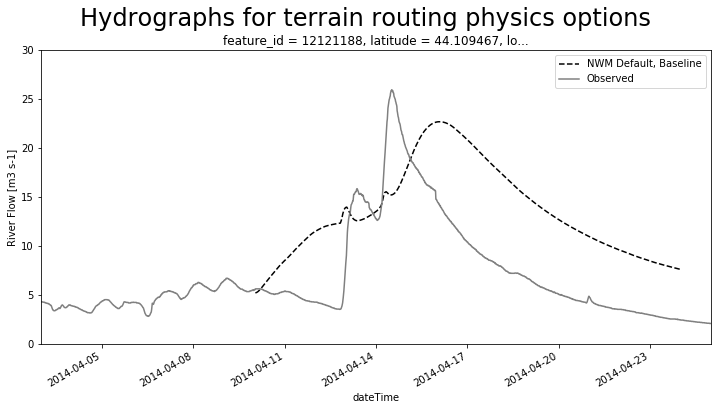

In [48]:
fig, axes = plt.subplots(ncols=1,figsize=(12, 6))
plt.suptitle('Hydrographs for terrain routing physics options',fontsize=24)
chanobs_control.sel(feature_id = 12121188).streamflow.plot(label='NWM Default, Baseline',
                                                        color='black',
                                                        linestyle='--')
obs[obs['site_no'] == '04124500'].plot(x='dateTime',
                                       y='streamflow_cms',
                                       ax=axes,
                                       label='Observed',
                                       color='grey')
plt.ylim(0,30)
plt.legend()
plt.show()

**We have some work to do: the peaks are not well defined and the baseflow, especially in the tail, is much too high.**


**Plot the soil type**

In [ ]:
# Load the geogrid dataset for reference
geogrid = xr.open_dataset('~/GLERL_Training/run_NWM_baseline/DOMAIN/geo_em.d01.nc')

In [ ]:
# Plot the dominant soil type
fig, axes = plt.subplots(figsize=(6, 6))
geogrid.SCT_DOM.plot(levels=17, cmap='Dark2')
axes.set_title('Soil Type')
plt.show()

The top-level soil moisture state shows significant differences with and without terrain routing active. Overall, we see much more heterogeneity in the "terrain routing on" run (above, left) due to lateral redistribution of water. In the "terrain routing off" run (above, right), soil moisture distribution is largely controlled by vertical soil properties (e.g., saturated hydraulic conductivity, porosity), and you distinctly see the soil type pattern in the soil moisture states.

**Plot the mean soil moisture time series**

In [67]:
ldasout_baseline = xr.open_mfdataset('/glade/u/home/lread/GLERL_Training/run_NWM_baseline/*.LDASOUT*',
                            concat_dim='time')
ldasout_mods = xr.open_mfdataset('/glade/u/home/lread/GLERL_Training/output/lesson5/run_parameter_mods/*.LDASOUT*',
                            concat_dim='time')


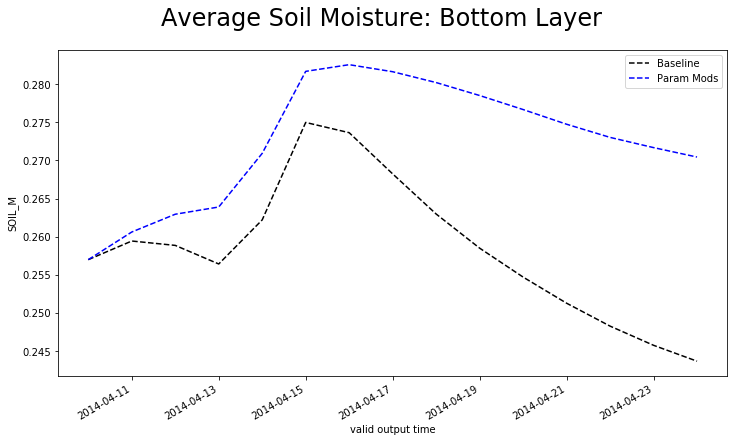

In [68]:
# Calculate the mean bottom-layer soil moisture across the domain
smois_basel_avg = ldasout_baseline.SOIL_M.sel(soil_layers_stag = 3).mean(dim=('y','x'))
smois_mods_avg = ldasout_mods.SOIL_M.sel(soil_layers_stag = 3).mean(dim=('y','x'))

# Plot the soil moisture time series
fig, axes = plt.subplots(ncols=1,figsize=(12, 6))
plt.suptitle('Average Soil Moisture: Bottom Layer',fontsize=24)
smois_basel_avg.plot(label='Baseline', color='black', linestyle='--')
smois_mods_avg.plot(label='Param Mods', color='blue', linestyle='--')

plt.legend()
plt.show()

## Experiment with Modified Parameters
There are a number of key parameters that impact water partitioning, storage, and movement through the model system. We have pulled many of the most important model parameters into NetCDF files to ease parameter display and manipulation, as well as to allow the parameters to vary independently in space. Key terrain routing parameter files include:
* soil_properties.nc - NoahMP soil and vegetation properties (LSM grid)
* hydro2dtbl.nc - Lateral routing model soil and surface parameters (LSM grid)
* Fulldom_hires.nc - Lateral routing model high-res parameters (routing grid)
* GWBUCKPARM.nc - Groundwater baseflow bucket model parameters (groundwater basin objects)

In this lesson, we will manipulate parameters in the `soil_properties.nc` (*refkdt*, *dksat*, *slope*). 

### Step 1: Create a new template directory and and run default parameter test case
As in the first section, we will make a new simulation directory and use this as a template for creating multiple new simulation directories. However, for these experiments to have a clean baseline unimpacted by calibration, we will use a set of domain and restart files built with default (uncalibrated) paramaters.

**Step 1a: Create a new template directory for the parameter experiments.**

In [ ]:
%%bash
# Make a new directory for our default baseline simulation
mkdir -p ~/GLERL_Training/output/lesson5/run_parameter_mods

# Copy our model files to the simulation directory
cp ~/GLERL_Training/run_NWM_template/*.TBL \
~/GLERL_Training/output/lesson5/run_parameter_mods
cp ~/GLERL_Training/wrf_hydro_nwm_public/trunk/NDHMS/Run/wrf_hydro.exe \
~/GLERL_Training/output/lesson5/run_parameter_mods

# Create symbolic links to large files
cp -as $HOME/GLERL_Training/run_NWM_template/FORCING \
~/GLERL_Training/output/lesson5/run_parameter_mods
cp -as $HOME/GLERL_Training/run_NWM_template/RESTARTS \
~/GLERL_Training/output/lesson5/run_parameter_mods/RESTARTS

# Copy the domain/parameter files so we can modify them
cp -r $HOME/GLERL_Training/run_NWM_template/DOMAIN \
~/GLERL_Training/output/lesson5/run_parameter_mods/DOMAIN

# Copy namelist files
cp ~/GLERL_Training/run_NWM_template/namelist.hrldas \
~/GLERL_Training/output/lesson5/run_parameter_mods
cp ~/GLERL_Training/run_NWM_template/hydro.namelist \
~/GLERL_Training/output/lesson5/run_parameter_mods

### Step 2: Modify NoahMP parameters using NCO tools

We will create a new simulation directory for our parameter manipulation experiment. All of the parameter file edits will be done using NCO. NCO (NetCDF Operators, http://nco.sourceforge.net/) is a set of useful utilities to manipulate NetCDF files.

**Step 2a: Setup the parameter experiment run directory**

First make a new run directory where we can start modifying parameter files.

In [50]:
%%bash
mkdir -p ~/GLERL_Training/output/lesson5/run_parameter_mods
cp -r ~/GLERL_Training/run_NWM_template/* \
~/GLERL_Training/output/lesson5/run_parameter_mods/

**Step 2b: Use the NCO command `ncap2` to modify the *refkdt* parameter values in the `soil_properties.nc` file.**

**REFKDT**

There are a number of model parameters that affect lateral terrain flow. One important Noah/NoahMP parameter that we commonly adjust when activating terrain routing is *refkdt*. *Refkdt* controls how easily precipitation reaching the surface infiltrates into the soil column vs. stays on the surface where it will be "scraped" off as surface runoff. Higher values of *refkdt* lead to more infiltration and less surface (fast) runoff. This tunable parameter can be set to a relatively high value (e.g., 3.0) suitable for running the column land surface model only. When activating terrain routing to explicitly model these processes, we often reduce this parameter. In addition, if you are calling the land surface model on a small timestep (e.g., seconds to minutes), you may want to reduce this parameter to compensate for the more frequent calls to the vertical infiltration scheme. 

Here we will use the NCO command `ncap2` to increase the *refkdt* value.

First, we check the current parameter values using `ncdump`.

In [51]:
%%bash
ncdump -v refkdt ~/GLERL_Training/output/lesson5/run_parameter_mods/DOMAIN/soil_properties.nc \
| tail -n 10

  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ;
}


The default value for *refkdt* is a global 1.0. We modify the parameter values using `ncap2` to a lower value (0.5) to encourage more infiltration and slow the flow peaks.

In [52]:
%%bash
ncap2 -O -s "refkdt=refkdt*0.0+0.1" \
~/GLERL_Training/output/lesson5/run_parameter_mods/DOMAIN/soil_properties.nc \
~/GLERL_Training/output/lesson5/run_parameter_mods/DOMAIN/soil_properties.nc

We check to make sure the changes are as expected.

In [53]:
%%bash
ncdump -v refkdt ~/GLERL_Training/output/lesson5/run_parameter_mods/DOMAIN/soil_properties.nc \
| tail -n 10

    0.1, 0.1, 0.1,
  0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 
    0.1, 0.1, 0.1,
  0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 
    0.1, 0.1, 0.1,
  0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 
    0.1, 0.1, 0.1,
  0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 
    0.1, 0.1, 0.1 ;
}


**Step 2d: Use the NCO command `ncap2` to modify the *slope* parameter values in the `soil_properties.nc` file.**

**SLOPE**

Another important Noah/NoahMP parameter that we commonly adjust is *slope*. Originally estimated based on land surface topography (hence the name *slope*), the *slope* parameter actually controls how open or closed the bottom boundary of the soil column is. Values range from 0 to 1, where 0 is a completely closed bottom boundary and 1 is completely open. Lower *slope* values will keep more water in the soil column, while higher values will allow more water to drain to the channel or to deeper baseflow stores, depending on the selected baseflow physics options.

As with *refkdt* and *dksat* above, we will use the NCO command `ncap2` to modify the *slope* value.

First, we check the current parameter values using `ncdump`.

In [54]:
%%bash
ncdump -v slope ~/GLERL_Training/output/lesson5/run_parameter_mods/DOMAIN/soil_properties.nc \
| tail -n 10

    0.3, 0.3, 0.3,
  0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 
    0.3, 0.3, 0.3,
  0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 
    0.3, 0.3, 0.3,
  0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 
    0.3, 0.3, 0.3,
  0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 
    0.3, 0.3, 0.3 ;
}


The default value for *slope* is a global 0.3. We modify the parameter values using `ncap2` to a lower value (0.1) to reduce the deeper baseflow component. 

In [55]:
%%bash
ncap2 -O -s "slope=slope*0+0.1" \
~/GLERL_Training/output/lesson5/run_parameter_mods/DOMAIN/soil_properties.nc \
~/GLERL_Training/output/lesson5/run_parameter_mods/DOMAIN/soil_properties.nc
ncdump -v slope ~/GLERL_Training/output/lesson5/run_parameter_mods/DOMAIN/soil_properties.nc \
| tail -n 10

    0.1, 0.1, 0.1,
  0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 
    0.1, 0.1, 0.1,
  0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 
    0.1, 0.1, 0.1,
  0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 
    0.1, 0.1, 0.1,
  0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 
    0.1, 0.1, 0.1 ;
}


### Step 3: Modify terrain routing parameters using NCO tools

Now we will turn our attention to the parameters that affect lateral routing behavior.

**Step 3a: Use the NCO command `ncap2` to modify the *LKSATFAC* parameter values in the `Fulldom_hires.nc` file**

**LKSATFAC**

The Fulldom_hires.nc file contains two parameters that are also important for lateral flow processes. The *LKSATFAC* parameter is a multiplier on the prescribed lateral saturated hydraulic conductivity values specified in `hydro2dtbl.nc`. By default, lateral conductivity in `hydro2dtbl.nc` matches vertical conductivity specified in `soil_properties.nc`. However, in the real world we frequently see many orders of magnitude higher conductivities in the lateral direction vs. the vertical direction (due to soil stratigraphy, preferential flowpaths caused by roots and animals, etc.). *LKSATFAC* is an easy way to adjust this anisotropy, and by default it is set to 1,000.

We will use the NCO command `ncap2` to increase the *LKSATFAC* value by a factor of 15.

First, we check the current parameter values.

In [56]:
%%bash
ncdump -v LKSATFAC ~/GLERL_Training/output/lesson5/run_parameter_mods/DOMAIN/Fulldom_hires.nc \
| tail -n 10

    1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 
    1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 
    1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
  1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 
    1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 
    1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 
    1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 
    1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 
    1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000 ;
}


In [57]:
%%bash
ncap2 -O -s "LKSATFAC=LKSATFAC*10" \
~/GLERL_Training/output/lesson5/run_parameter_mods/DOMAIN/Fulldom_hires.nc \
~/GLERL_Training/output/lesson5/run_parameter_mods/DOMAIN/Fulldom_hires.nc
ncdump -v LKSATFAC ~/GLERL_Training/output/lesson5/run_parameter_mods/DOMAIN/Fulldom_hires.nc \
| tail -n 10

    10000, 10000,
  10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 
    10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 
    10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 
    10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 
    10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 
    10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 
    10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 
    10000, 10000 ;
}


**Step 2c: Use the NCO command `ncap2` to modify the *dksat* parameter values in the `soil_properties.nc` file.**

**DKSAT**

As with most physically-based hydrological models, the soil saturated hydraulic conductivity (*dksat*) controls the speed at which water moves through the subsurface. This is a sensitive parameter in the model, and while easy to measure at the point scale, *dksat* is tricky to estimate at the scale of kilometers. In the NWM, initial values are estimated based on soil texture class, but reported ranges have large (many orders of magnitude) variability. This is a common calibration parameter, along with the related *bexp* parameter that controls how actual conductivity is scaled from saturated conductivity based on soil water content.

Here we will use the NCO command `ncap2` to deccrease the *dksat* value by a factor, 0.7.

We check the current parameter values using `ncdump`, then modify it.

In [ ]:
%%bash 
ncdump -v dksat ~/GLERL_Training/output/lesson5/run_parameter_mods/DOMAIN/soil_properties.nc \
| tail -n 10

In [58]:
%%bash
ncap2 -O -s "dksat=dksat*0.7" \
~/GLERL_Training/output/lesson5/run_parameter_mods/DOMAIN/soil_properties.nc \
~/GLERL_Training/output/lesson5/run_parameter_mods/DOMAIN/soil_properties.nc
ncdump -v dksat ~/GLERL_Training/output/lesson5/run_parameter_mods/DOMAIN/soil_properties.nc \
| tail -n 10

    7.32200023776386e-06, 7.32200023776386e-06, 7.32200023776386e-06, 
    7.32200023776386e-06, 6.52399976388551e-05, 6.52399976388551e-05, 
    6.52399976388551e-05, 6.52399976388551e-05, 6.52399976388551e-05,
  4.73199993393791e-06, 4.73199993393791e-06, 6.52399976388551e-05, 
    6.52399976388551e-05, 6.52399976388551e-05, 6.52399976388551e-05, 
    7.32200023776386e-06, 7.32200023776386e-06, 7.32200023776386e-06, 
    7.32200023776386e-06, 7.32200023776386e-06, 7.32200023776386e-06, 
    7.32200023776386e-06, 7.32200023776386e-06, 7.32200023776386e-06, 
    7.32200023776386e-06, 7.32200023776386e-06, 7.32200023776386e-06 ;
}


**Step 3b: Run the simulation**

Now we are ready to run a simulation with our new modified parameters.

In [59]:
%%bash
cd ~/GLERL_Training/output/lesson5/run_parameter_mods
mpirun -np 2 ./wrf_hydro.exe >> run.log 2>&1

Check to make sure your run completed successfully.

In [60]:
%%bash
tail -1 ~/GLERL_Training/output/lesson5/run_parameter_mods/diag_hydro.00000

 accumulated time (s):    14.0000000000000     


### Results
We will now look at the differences in streamflow between our baseline run with default parmeters and the simulation using our new modified parameters.

We will use Python and the `xarray` library to load the data and plot hydrographs. For an intro to these tools, please see Lesson 3.

**Load the CHANOBS streamflow datasets**

We are going to use the CHANOBS files because it will limit the number of reaches to only those which we have specified have a gage.

In [61]:
# Load the xarray package
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
chanobs_control = xr.open_mfdataset('/glade/u/home/lread/GLERL_Training/run_NWM_baseline/*CHANOBS*',
                            concat_dim='time')

In [62]:
# Pull the channel output files into xarray objects 
chanobs_mod_params = xr.open_mfdataset('/glade/u/home/lread/GLERL_Training/output/lesson5/run_parameter_mods/*CHANOBS*',
                            concat_dim='time')

In [63]:
obs = pd.read_csv('~/GLERL_Training/run_NWM_template/USGS_obs.csv',dtype=str)
obs['dateTime'] = pd.to_datetime(obs['dateTime'])
obs['streamflow_cms'] = pd.to_numeric(obs['streamflow_cms'])

**Plot the hydrographs**

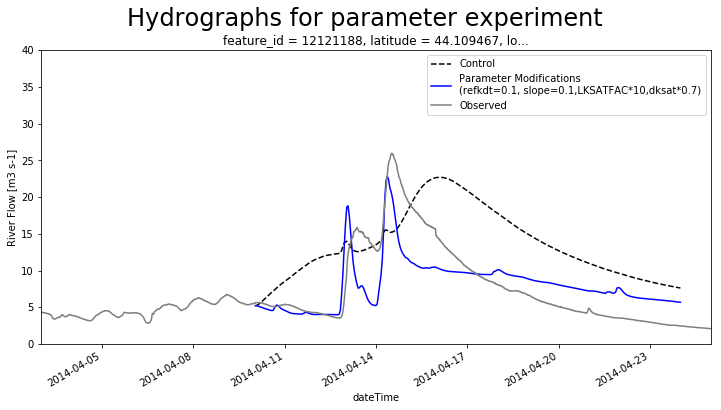

In [65]:
fig, axes = plt.subplots(ncols=1,figsize=(12, 6))
plt.suptitle('Hydrographs for parameter experiment',fontsize=24)
chanobs_control.sel(feature_id = 12121188).streamflow.plot(label='Control',
                                                        color='black',
                                                        linestyle='--')
chanobs_mod_params.sel(feature_id = 12121188).streamflow.plot(label='Parameter Modifications\n(refkdt=0.1, slope=0.1,LKSATFAC*10,dksat*0.7)',
                                                        color='blue',
                                                        linestyle='-')
obs[obs['site_no'] == '04124500'].plot(x='dateTime',
                                       y='streamflow_cms',
                                       ax=axes,
                                       label='Observed',
                                       color='grey')
plt.ylim(0,40)
plt.legend()
plt.show()

### Discussion
We abbreviated this parameter calibration exercise to fit within a short lesson. In practice, you would want to give the model time to adjust to a new parameter set by running an extended "spin-up" period before the time period you are evaluating. You would also want to expose the model to a wider range of conditions than the short event demostrated here. Model parameters calibrated to a short event may not transfer well to other time periods. Good practice is to calibrate your model to a wide range of conditions to minimize the impacts of forcing, gage, or model physics/parameter uncertainties.

# Next up - Do it yourself!
This concludes Lesson 5a. Spend some time creating your own parameter and physics experiments.

**IT IS BEST TO EITHER SHUTDOWN THIS LESSON OR CLOSE IT BEFORE PROCEEDING TO THE NEXT LESSON TO AVOID POSSIBLY EXCEEDING ALLOCATED MEMORY. Shutdown the lesson be either closing the browser tab for the lesson or selecting `KERNAL->SHUTDOWN` in the jupyter notebook toolbar.**